# VIF-->Variance Inflation Factor

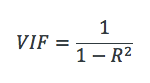

In [162]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
data=pd.read_csv('diabetes.csv')

In [164]:
df1=pd.DataFrame(data=data)

x1=df1.iloc[:,0:-1]
y1=df1.iloc[:,-1]

In [165]:
x1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [166]:
y1

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [167]:
x1.shape

(768, 8)

In [168]:
x1.shape[1]   #8 number of columns

8

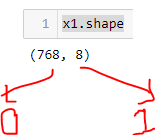

In [169]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
def calc_vif(x1):
    vif=pd.DataFrame()   #creating a vacant dataFrame
    vif['variables']=x1.columns        #add 'variables' column to the vacant DataFrame and put the column names form x1 DataFrame into it.
    vif['VIF factor']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [171]:
x1.shape

(768, 8)

In [172]:
calc_vif(x1)

,variables,VIF factor
0,Pregnancies,3.275748
1,Glucose,16.725078
2,BloodPressure,14.619512
3,SkinThickness,4.008696
4,Insulin,2.063689
5,BMI,18.408884
6,DiabetesPedigreeFunction,3.195626
7,Age,13.492985


<AxesSubplot:>

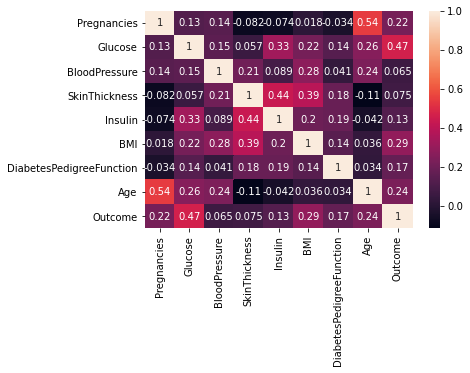

In [173]:
sns.heatmap(data.corr(),annot=True)

In [174]:
x1=x1.drop(['BMI'],axis=1)

In [175]:
x1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [176]:
calc_vif(x1)

,variables,VIF factor
0,Pregnancies,3.272901
1,Glucose,13.573749
2,BloodPressure,12.372453
3,SkinThickness,3.475236
4,Insulin,2.033589
5,DiabetesPedigreeFunction,3.151598
6,Age,13.381319


In [177]:
x1=x1.drop(['Glucose'],axis=1)

In [178]:
x1

,Pregnancies,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,72,35,0,0.627,50
1,1,66,29,0,0.351,31
2,8,64,0,0,0.672,32
3,1,66,23,94,0.167,21
4,0,40,35,168,2.288,33
...,...,...,...,...,...,...
763,10,76,48,180,0.171,63
764,2,70,27,0,0.340,27
765,5,72,23,112,0.245,30
766,1,60,0,0,0.349,47


In [179]:
#To drop two variables together
#x1=df1.drop(['BMI','Glucose'],axis=1)

In [180]:
calc_vif(x1)

,variables,VIF factor
0,Pregnancies,3.266130
1,BloodPressure,9.940457
2,SkinThickness,3.475014
3,Insulin,1.859553
4,DiabetesPedigreeFunction,3.026709
5,Age,10.896809


# ABALONE DATASET

In [181]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [182]:
df=pd.read_csv('Abalone.csv')
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [183]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [184]:
df=pd.DataFrame(data=df)

In [185]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [186]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

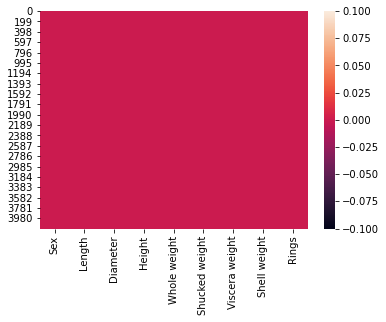

In [187]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

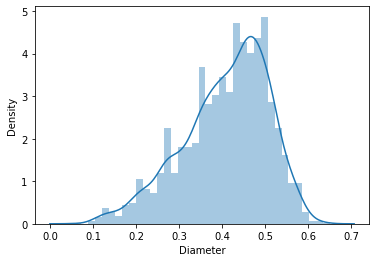

In [188]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

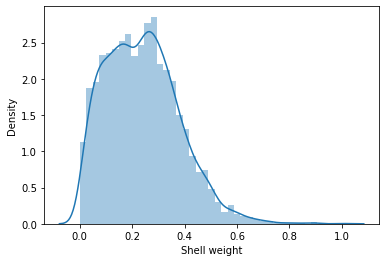

In [189]:
sns.distplot(df['Shell weight'])

In [190]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [191]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [192]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex']) #Encoder converts categorical data into numerical data.
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<AxesSubplot:xlabel='Height', ylabel='Density'>

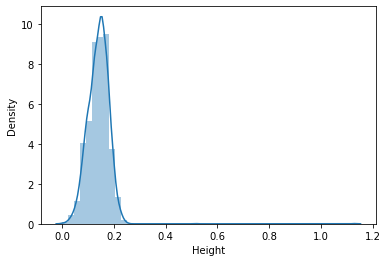

In [193]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

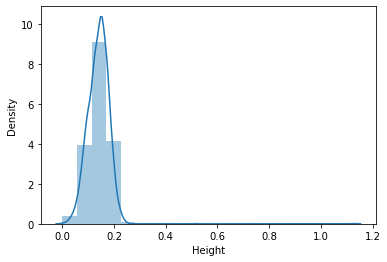

In [194]:
sns.distplot(df['Height'],bins=20)

In [195]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [196]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

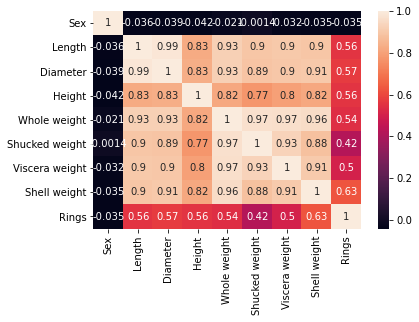

In [197]:
sns.heatmap(df.corr(),annot=True)

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [199]:
x=df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [200]:
x.shape

(4177, 8)

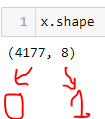

In [201]:
x.shape[1]

8

In [202]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [203]:
def vlf_calc():
    vlf=pd.DataFrame() #vacant DataFrame
    vlf['features']=x.columns
    vlf['VLF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vlf)

In [204]:
vlf_calc()

         features  VLF Factor
0             Sex    2.555356
1          Length  700.488988
2        Diameter  749.121626
3          Height   42.128924
4    Whole weight  421.652484
5  Shucked weight  101.674946
6  Viscera weight   63.585627
7    Shell weight   81.873737


<AxesSubplot:>

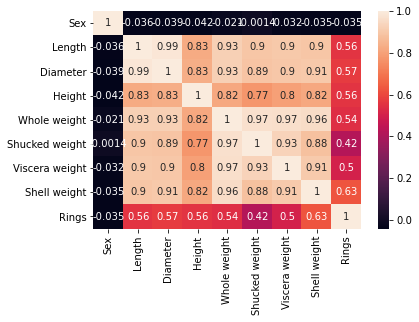

In [205]:
sns.heatmap(df.corr(),annot=True)

In [206]:
x.drop('Length',axis=1,inplace=True)

In [207]:
x

,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [208]:
vlf_calc()

         features  VLF Factor
0             Sex    2.535638
1        Diameter   47.381039
2          Height   41.753383
3    Whole weight  421.135142
4  Shucked weight  101.504085
5  Viscera weight   63.432936
6    Shell weight   81.106174


<AxesSubplot:>

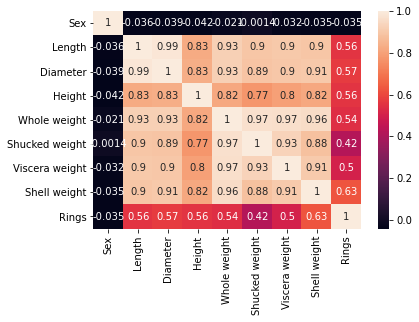

In [209]:
sns.heatmap(df.corr(),annot=True)

In [210]:
x.drop('Shucked weight',axis=1,inplace=True)

In [211]:
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [212]:
x.shape

(4177, 6)

In [213]:
vlf_calc()

         features  VLF Factor
0             Sex    2.532536
1        Diameter   46.978990
2          Height   41.650431
3    Whole weight  123.993316
4  Viscera weight   59.292682
5    Shell weight   49.403495


<AxesSubplot:>

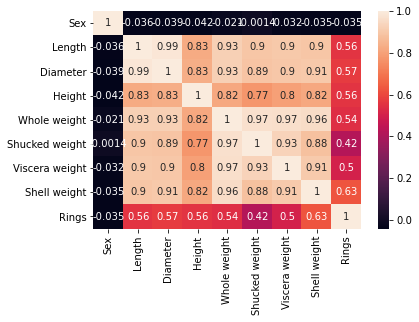

In [214]:
sns.heatmap(df.corr(),annot=True)

In [215]:
x.shape

(4177, 6)

In [216]:
y.shape

(4177,)

In [217]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15198011, -0.43214879, -1.06442415, -0.64189823, -0.72621157,
        -0.63821689],
       [ 1.15198011, -1.439929  , -1.18397831, -1.23027711, -1.20522124,
        -1.21298732],
       [-1.28068972,  0.12213032, -0.10799087, -0.30946926, -0.35668983,
        -0.20713907],
       ...,
       [ 1.15198011,  0.67640943,  1.56576738,  0.70821206,  0.97541324,
         0.49695471],
       [-1.28068972,  0.77718745,  0.25067161,  0.54199757,  0.73362741,
         0.41073914],
       [ 1.15198011,  1.48263359,  1.32665906,  2.28368063,  1.78744868,
         1.84048058]])

In [218]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [219]:
xtrain.shape

(2923, 6)

In [220]:
ytrain.shape

(2923,)

In [221]:
xtest.shape

(1254, 6)

In [222]:
ytest.shape

(1254,)

In [223]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print(lr.coef_)
print(lr.intercept_)

[ 0.01570564  0.90236923  0.44997775 -2.65910799 -0.2842277   3.66554767]
9.933995724435169
